Resnet50 İle Model Eğitimi
50 layer kullanıldığı için

In [67]:
from tensorflow.keras.applications.resnet50 import preprocess_input # Bir grup görüntüye ön işleme yapmak için kullanılır.
from tensorflow.keras.applications import ResNet50 
from tensorflow.keras.preprocessing.image import img_to_array # Görüntüyü diziye dönüştürmek için kullanılır.
from keras.applications import imagenet_utils 
import numpy as np
import cv2

In [68]:
import matplotlib.pyplot as plt
def display_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.show()

In [ ]:
import os
def file_path_write(file_name):
    file_path = f"media/{file_name}"
    current_directory = os.getcwd() # Bulunduğum dizin
    previous_directory = os.path.dirname(current_directory)# üst dizini
    absolute_path = os.path.join(previous_directory, file_path) #yolları birleştirir
    return absolute_path

In [79]:
from sliding_window import sliding_window
from maximum_non_maximum_pressure import non_maxi_suppression as nms
from piramit_gosterimi import image_premid

In [70]:
# İklendirme parametreleri
WIDTH = 600
HIGHT = 600
PYR_SCALE = 1.5 # piramit ölçek faktörü
WIN_STEP = 16 # kaydırma PİXSEL SAYISI
ROI_SIZE = (200, 150) # ROI boyutu
INPUT_SIZE = (224, 224) # ResNet giriş boyutu

In [71]:
print("Resnet Yukleniyor")
# Resnet internetten çalışıyor

model = ResNet50(weights="imagenet", include_top=True)
print(model)
print("Resnet Yuklendi")
# imagenet =  her bir düğümünün yüzlerce ve binlerce görüntü ile tasvir edildiği bir görüntü veritabanıdır.
# include_top = True, ağın tam olarak bağlı katmanlarını ekleyip eklemeyeceğimizi belirler.

Resnet Yukleniyor
<Functional name=resnet50, built=True>
Resnet Yuklendi


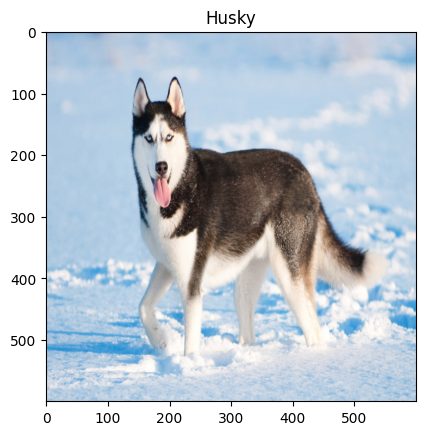

In [72]:
orig = cv2.imread(file_path_write("husky.jpg"))
orig = cv2.resize(orig, (WIDTH, HIGHT))
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
display_image(orig, "Husky")


In [73]:
(H,W) = orig.shape[:2]
#Image piramit
pyramid = image_premid(orig, scale=PYR_SCALE, minSize=ROI_SIZE)

rois = []
locs = []

for image in pyramid:
    # pyramiddeki her bir görüntü boyutu azaldığı için sliding video verceğimiz resimlerinde azalması gerekir
    scale = W / float(image.shape[1])

    for (x,y,roiOrig) in sliding_window(image, WIN_STEP, ROI_SIZE):

        x = int(x*scale)
        y = int(y*scale)
        w = int(ROI_SIZE[0]*scale)
        h = int(ROI_SIZE[1]*scale)
        roi = cv2.resize(roiOrig, INPUT_SIZE)
        roi = img_to_array(roi)
        roi = preprocess_input(roi)
        rois.append(roi)
        locs.append((x,y,x+w,y+h)) #tuple

rois = np.array(rois, dtype="float32")

print("Sınıflandırma yapılıyor")
predis = model.predict(rois)
print(predis)
# imagenet id, label , prompt


Sınıflandırma yapılıyor
31/31 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step
[[8.3146837e-08 9.9995816e-07 2.6897897e-06 ... 1.8820869e-07
  2.9622686e-05 4.7323963e-05]
 [3.8233122e-08 3.1200489e-07 5.9985172e-07 ... 7.1865493e-08
  1.5773880e-05 1.4064559e-05]
 [1.7253014e-07 7.5817246e-07 3.2774690e-06 ... 1.8231349e-07
  2.9892217e-05 2.6292553e-05]
 ...
 [4.3266407e-10 2.1633166e-09 3.7208965e-09 ... 3.9957891e-11
  4.1177807e-07 1.9439772e-08]
 [5.2022286e-10 4.5991566e-09 3.4549128e-09 ... 4.3875199e-11
  2.3987693e-07 3.5735646e-08]
 [1.8208174e-09 1.8491141e-08 7.0654700e-09 ... 2.4539784e-10
  1.0805011e-06 1.0706472e-07]]


In [74]:
preds = imagenet_utils.decode_predictions(predis, top=1) # veriyi temize çekmek için kullanılır
# top=1 en yüksek olasılıklı tahminleri alır
print(preds)

[[('n02109961', 'Eskimo_dog', 0.60596025)], [('n02109961', 'Eskimo_dog', 0.629932)], [('n02109961', 'Eskimo_dog', 0.72910666)], [('n02109961', 'Eskimo_dog', 0.7326368)], [('n02109961', 'Eskimo_dog', 0.7097636)], [('n02109961', 'Eskimo_dog', 0.6411072)], [('n02109961', 'Eskimo_dog', 0.6497146)], [('n02109961', 'Eskimo_dog', 0.68590105)], [('n02109961', 'Eskimo_dog', 0.6972109)], [('n02109961', 'Eskimo_dog', 0.6397438)], [('n02109961', 'Eskimo_dog', 0.5434088)], [('n02109961', 'Eskimo_dog', 0.6108912)], [('n02109961', 'Eskimo_dog', 0.37576434)], [('n02096585', 'Boston_bull', 0.074723154)], [('n03888257', 'parachute', 0.18850991)], [('n03888257', 'parachute', 0.16303861)], [('n03888257', 'parachute', 0.19231123)], [('n03888257', 'parachute', 0.21608853)], [('n03888257', 'parachute', 0.19945082)], [('n03888257', 'parachute', 0.17202625)], [('n03888257', 'parachute', 0.21530528)], [('n03888257', 'parachute', 0.19658464)], [('n03888257', 'parachute', 0.17409553)], [('n03888257', 'parachute',

In [104]:
import numpy as np
import cv2

def non_maxi_suppression(boxes, probs=None, overlapThresh=0.3):
    #overlapThresh: kutuların ne kadar örtüşebileceğini belirleyen eşik değeri ayarlarnır
    # kutu seçimi yapama durumunda boş liste döndürüyor
    if len(boxes) == 0:
        return []
    if boxes.dtype.kind == "i": # gele nkutunun veri tipi int ise floata çeviriyoruz.
        boxes = boxes.astype("float")

    x1 = boxes[:, 0] # kutuların x1 koordinatları (sol üst)
    y1 = boxes[:, 1] # kutuların y1 koordinatları (sol üst)
    x2 = boxes[:, 2] # kutuların x2 koordinatları (sağ alt)
    y2 = boxes[:, 3] # kutuların y2 koordinatları (sağ alt)

    area = (x2 - x1 +1) * (y2 - y1 +1)  # kutuların alanları hesaplanır

    idxs = y2 # kutuların y2 koordinatlarından indexler oluşturulur

    # olasılık değerleri

    if probs is not None:
        idxs = probs
    
    idxs = np.argsort(idxs) # indexler küçükten büyüğe sıralanır

    pick = [] # kutuların seçileceği liste oluşturulur

    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # en büyük ve en küçük x ve y değerleri bulunur

        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        # w, h, bul

        w = np.maximum(0, xx2- xx1 + 1)
        h = np.maximum(0, yy2- yy1 + 1)

        # overlap oranı hesaplanır

        overlap = (w * h) / area[idxs[:last]]

        # overlap oranı eşik değerinden altında olan kutuları listeden çıkarır

        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlapThresh)[0])))

    return boxes[pick].astype("int")

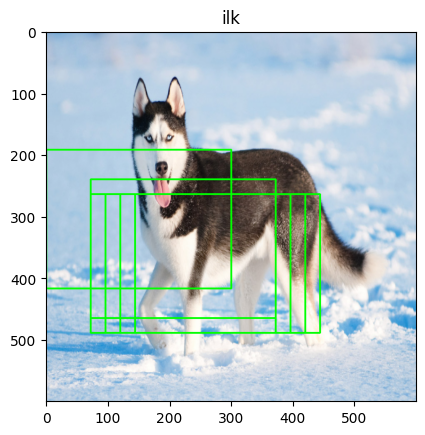

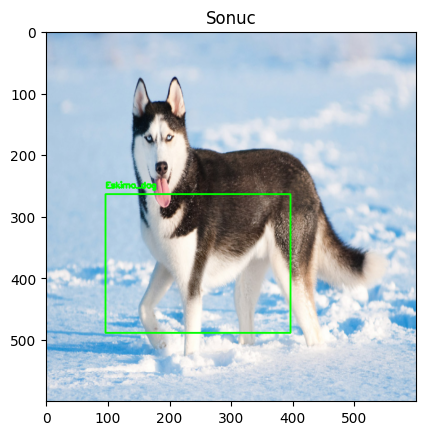

In [106]:
min_conf = 0.9 # minumum olasılık değeri
labels = {} # en yüksek olasılıklı tahminleri alır

# resimdeki istenen değeri belirlediğimiz değerin üstünde ise alır
for (i,p) in enumerate(preds):
    (imagenet_id,label, prob) = p[0]
    if label == "Eskimo_dog":
        if prob >= min_conf: # min_conf değerinden büyük olanları alır
            box = locs[i] 
            L = labels.get(label, []) # label varsa alır yoksa boş bir liste oluşturur
            L.append((box, prob)) # label ve olasılığı ekler
            labels[label] = L # labes listesine ekler

for label in labels.keys():
    clone = orig.copy()
    for (box, prob) in labels[label]:
        (startX, startY, endX, endY) = box
        cv2.rectangle(clone, (startX, startY), (endX, endY), (0,255,0), 2)
    
    display_image(clone, "ilk")

    clone = orig.copy()

    # non-maximum suppression
    boxes = np.array([p[0] for p in labels[label]])
    proba = np.array([p[1] for p in labels[label]])

    boxes = non_maxi_suppression(boxes=boxes, probs=proba)

    for (startX, startY, endX, endY) in boxes:
        cv2.rectangle(clone, (startX, startY), (endX, endY), (0,255,0), 2)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(clone, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0,255,0), 2)

    display_image(clone, "Sonuc")

    if cv2.waitKey(0) & 0xFF == ord("q"):
        break
